In [ ]:
!git clone https://github.com/mihaijulien/Facial-Expression-Recognition

Cloning into 'Facial-Expression-Recognition'...
remote: Enumerating objects: 34057, done.
remote: Counting objects: 100% (34057/34057), done.
remote: Compressing objects: 100% (34052/34052), done.
remote: Total 34057 (delta 5), reused 34053 (delta 4), pack-reused 0
Receiving objects: 100% (34057/34057), 52.45 MiB | 12.11 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (35889/35889), done.


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version ", tf.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Tensorflow version  2.2.0


In [ ]:
repo = "Facial-Expression-Recognition"
train = os.path.join(repo, "dataset", "train")
test = os.path.join(repo, 'dataset', 'test')

for expression in os.listdir(train):
  print(str(len(os.listdir(os.path.join(train, expression)))) + " " + expression + " images")

3995 angry images
4965 neutral images
7215 happy images
4830 sad images
436 disgust images
4097 fear images
3171 surprise images


In [ ]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory(train, target_size=(img_size, img_size), 
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)
datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_train.flow_from_directory(test, target_size=(img_size, img_size), 
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
model = Sequential()
# 1st conv block
model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 2nd conv block
model.add(Conv2D(64, kernel_size=(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 3rd conv block
model.add(Conv2D(128, kernel_size=(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 4th conv block
model.add(Conv2D(256, kernel_size=(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        2

In [ ]:
epochs = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor="val_accuracy", 
                             save_weights_only=True, mode='max', verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2,
                             min_lr=0.00001, model='auto')

callbacks= [checkpoint, reduce_lr]

history = model.fit(x=train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_steps,
                    callbacks=callbacks)

Epoch 1/15
447/448 [============================>.] - ETA: 0s - loss: 1.7824 - accuracy: 0.3102
Epoch 00001: saving model to model_weights.h5
448/448 [==============================] - 17s 39ms/step - loss: 1.7822 - accuracy: 0.3104 - val_loss: 1.7781 - val_accuracy: 0.3216 - lr: 0.0010
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.4607 - accuracy: 0.4370
Epoch 00002: saving model to model_weights.h5
448/448 [==============================] - 17s 37ms/step - loss: 1.4607 - accuracy: 0.4370 - val_loss: 1.3179 - val_accuracy: 0.4909 - lr: 0.0010
Epoch 3/15
447/448 [============================>.] - ETA: 0s - loss: 1.3180 - accuracy: 0.4972
Epoch 00003: saving model to model_weights.h5
448/448 [==============================] - 16s 37ms/step - loss: 1.3181 - accuracy: 0.4972 - val_loss: 1.3403 - val_accuracy: 0.4646 - lr: 0.0010
Epoch 4/15
447/448 [============================>.] - ETA: 0s - loss: 1.2497 - accuracy: 0.5215
Epoch 00004: saving model to model_weigh

Text(0.5, 0, 'epoch')

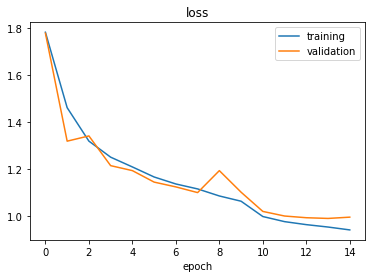

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

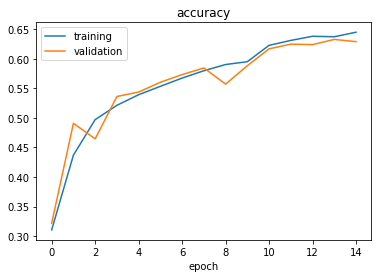

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('accuracy')
plt.xlabel('epoch')

In [ ]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
  json_file.write(model_json)

from google.colab import files

files.download('model.json')
files.download('model_weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>